# Credit Card Risk Classification: Logistic Regression vs. Ensemble Learning

## I. Introduction

This study aims to explore and compare the effectiveness of Logistic Regression and Ensemble Learning algorithms in tackling the credit card risk assessment.

### 1. Objectives

The primary objectives of this project are as follows:

**Data Preparation:** Explore, preprocess, and clean the raw data to make it suitable for modeling, ensuring its readiness for the subsequent modeling phases. 

**Feature Engineering:** Create relevant features, including transforming categorical variables into a suitable format for machine learning.

**Modeling:** Develop a decision tree classifier to predict credit card risk levels based on customer attributes and transaction data.

**Model Evaluation:** Assess the model's performance using cross-validation, classification reports, and confusion matrices.

**Comparison:** Compare the accuracy and precision of different models to determine their effectiveness in credit card risk assessment.



### 2. Table of Contents

## I. Introduction
### 1. Objectives
## II. Importing the nessesary libraries
## III. Exploartory Data Analisys (EDA)
### 1. Loading the raw data
### 2. Displaying statistical information about the dataset
### 3. Checking for missing values
### 4. Separating inputs and targets
### 6. Creating dummy - input variables 
### 7. Converting the categorical target variable into numerical values - target variable
### 8. Feature Correlation
### 9. Target Variables Distribution
#### 9.1 Observing the Distribution of RISK CLASSES
#### 9.2 Observing the GENDER Distribution
#### 9.3 Observing the LIMIT Distribution
### 10. Exploring Data Distributions and Outliers
#### 10.1 Detecting Outliers using KDE
#### 10.2 Detecting Outliers using Box Plot
## IV. Data Preparation
### 1. Splitting the data into training and testing sets
## V. Model Initialization and Performance Evaluation
### 1. Logistic Regression
#### 1.1 Data Preprocessing for Logistic Regression
##### 1.1.1 Class Balancing using Random Oversimple
##### 1.1.2 Feature Scaling
#### 1.2 Model Deployment
##### 1.2.1 Model Deployment (NO Preprocessing)
##### 1.2.2 Model Deployment (WITH Preprocessing)
#### 1.3 Model Evaluation
##### 1.3.1 Model Evaluation (NO Preprocessing)
##### 1.3.2 Model Evaluation (WITH Preprocessing)
### 2. Decison Trees Classifier
#### 2.1 Model Deployment
#### 2.2 Model Evaluation
### 3. Random Forest Classifier
#### 3.1 Model Deployment
#### 3.2 Model Evaluation
### 4. XGboost Classifier
#### 4.1 Model Deployment
##### 4.1.1 Model Deployment (WITHOUT using cross-validation)
##### 4.2.2 Model Deployment (USING cross-validation)
#### 4.2 Model Evaluation
##### 4.2.1 Model Evaluation (WITHOUT using cross-validation)
##### 4.2.2 Model Evaluation (USING cross-validation)
### 5. Models Performance Summary
#### 5.1 Accuracy and Precision Comparison
#### 5.2 GINI Index Comparison for Ensemble Models








## II. Importing the nessesary libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score, RocCurveDisplay, roc_curve, auc


import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## III. Exploartory Data Analisys (EDA)

### 1. Loading the raw data

In [2]:
raw_data = pd.read_csv("C:/Users/aleksandar.dimitrov/Desktop/1.csv")
raw_data.head()

,CID,Gender,Limit,AverageTransactionValue,MDP,Unpaid Daily Principle,Unpaid Interest,TotalDuetoReset,DayDelay,Card Status,Risk Class
0,14000072,Woman,300,79.35,45.0,267.73,9.69,301.30,0,Active,LowRisk
1,14000075,Man,600,25.64,90.0,396.73,8.88,405.61,0,Active,LowRisk
2,14000077,Woman,700,95.73,105.0,559.34,20.78,636.05,0,Active,LowRisk
3,14000078,Man,500,59.26,75.0,126.96,0.75,127.71,0,Active,LowRisk
4,14000084,Man,300,58.82,45.0,272.37,28.47,300.84,0,Active,LowRisk


### 2. Displaying statistical information about the dataset

In [3]:
raw_data.describe(include="all")

,CID,Gender,Limit,AverageTransactionValue,MDP,Unpaid Daily Principle,Unpaid Interest,TotalDuetoReset,DayDelay,Card Status,Risk Class
count,7.958000e+03,7958,7958.000000,7958.000000,7958.000000,7958.000000,7958.000000,7958.000000,7958.000000,7958,7958
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,3
top,NaN,Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blocked by The company,LowRisk
freq,NaN,5188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4013,5028
mean,1.400584e+07,NaN,390.110581,74.492286,57.497465,350.617620,19.972495,469.018526,101.610078,NaN,NaN
std,3.293741e+03,NaN,146.301092,79.291633,22.103185,152.324925,17.664132,201.137114,133.674150,NaN,NaN
min,1.400007e+07,NaN,300.000000,1.000000,0.010000,-65.990000,0.000000,-65.830000,0.000000,NaN,NaN
25%,1.400300e+07,NaN,300.000000,27.580000,45.000000,292.500000,9.922500,324.792500,0.000000,NaN,NaN
50%,1.400592e+07,NaN,300.000000,46.085000,45.000000,299.150000,17.305000,484.770000,27.000000,NaN,NaN
75%,1.400870e+07,NaN,500.000000,89.695000,75.000000,399.412500,23.197500,536.342500,180.000000,NaN,NaN


### 3. Checking for missing values

In [4]:
missing_values = raw_data.isnull().sum()
missing_values

CID                        0
Gender                     0
Limit                      0
AverageTransactionValue    0
MDP                        0
Unpaid Daily Principle     0
Unpaid Interest            0
TotalDuetoReset            0
DayDelay                   0
Card Status                0
Risk Class                 0
dtype: int64

### 4. Separating inputs and targets

In [5]:
data_inputs = raw_data.iloc[:, :-1]
data_targets = raw_data.iloc[:, -1]

In [6]:
data_inputs.head()

,CID,Gender,Limit,AverageTransactionValue,MDP,Unpaid Daily Principle,Unpaid Interest,TotalDuetoReset,DayDelay,Card Status
0,14000072,Woman,300,79.35,45.0,267.73,9.69,301.30,0,Active
1,14000075,Man,600,25.64,90.0,396.73,8.88,405.61,0,Active
2,14000077,Woman,700,95.73,105.0,559.34,20.78,636.05,0,Active
3,14000078,Man,500,59.26,75.0,126.96,0.75,127.71,0,Active
4,14000084,Man,300,58.82,45.0,272.37,28.47,300.84,0,Active


In [7]:
data_targets.head()

0    LowRisk
1    LowRisk
2    LowRisk
3    LowRisk
4    LowRisk
Name: Risk Class, dtype: object

### 5. Creating dummy - input variables 

In [8]:
df_features = pd.get_dummies(data_inputs)
df_features.head()

,CID,Limit,AverageTransactionValue,MDP,Unpaid Daily Principle,Unpaid Interest,TotalDuetoReset,DayDelay,Gender_Man,Gender_Woman,Card Status_Active,Card Status_Blocked by Customer,Card Status_Blocked by The company,Card Status_Lost,Card Status_Stolen
0,14000072,300,79.35,45.0,267.73,9.69,301.30,0,0,1,1,0,0,0,0
1,14000075,600,25.64,90.0,396.73,8.88,405.61,0,1,0,1,0,0,0,0
2,14000077,700,95.73,105.0,559.34,20.78,636.05,0,0,1,1,0,0,0,0
3,14000078,500,59.26,75.0,126.96,0.75,127.71,0,1,0,1,0,0,0,0
4,14000084,300,58.82,45.0,272.37,28.47,300.84,0,1,0,1,0,0,0,0


### 6. Converting the categorical target variable into numerical values - target variable

**0 - Low Risk**

**1 - Medium Risk**

**2 - High Risk**


In [9]:
df_targets = data_targets.astype("category").cat.codes
df_targets.head()

0    1
1    1
2    1
3    1
4    1
dtype: int8

In [10]:
counts = df_targets.value_counts()
counts


1    5028
0    1598
2    1332
dtype: int64

### 7. Feature Correlation

#### 7.1 Correlation Matrix

C:\Users\aleksandar.dimitrov\AppData\Local\Temp\ipykernel_2332\3918191871.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = raw_data.corr()


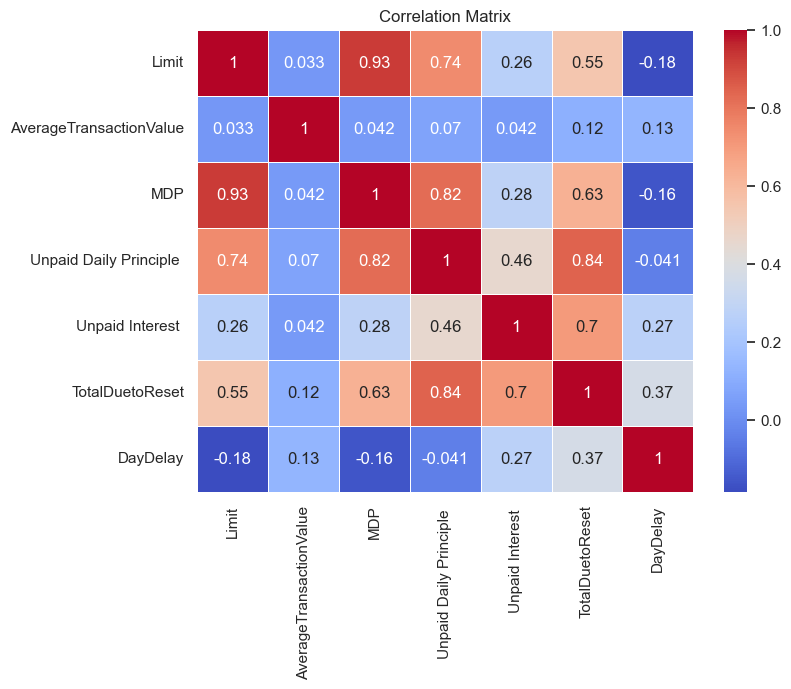

In [11]:
raw_data.drop(columns=["CID"], inplace=True)
correlation_matrix = raw_data.corr()
plt.figure(figsize=(8, 6))
ax = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
ax.set_frame_on(True) 
plt.title("Correlation Matrix")
plt.show()

#### 7.2 Assessment of Multicollinearity with Variance Inflation Factor (VIF)

In [12]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_features
X = sm.add_constant(X)
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                              Features        VIF
0                                const   0.000000
1                                  CID   1.779477
2                                Limit   7.653506
3              AverageTransactionValue   1.061071
4                                  MDP  10.442624
5              Unpaid Daily Principle   14.776906
6                     Unpaid Interest    2.759740
7                      TotalDuetoReset  20.920828
8                             DayDelay   3.853621
9                           Gender_Man        inf
10                        Gender_Woman        inf
11                  Card Status_Active        inf
12     Card Status_Blocked by Customer        inf
13  Card Status_Blocked by The company        inf
14                    Card Status_Lost        inf
15                  Card Status_Stolen        inf


C:\Users\aleksandar.dimitrov\AppData\Local\anaconda\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\aleksandar.dimitrov\AppData\Local\anaconda\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


### 8. Target Variables Distribution

#### 8.1 Observing the Distribution of RISK CLASSES

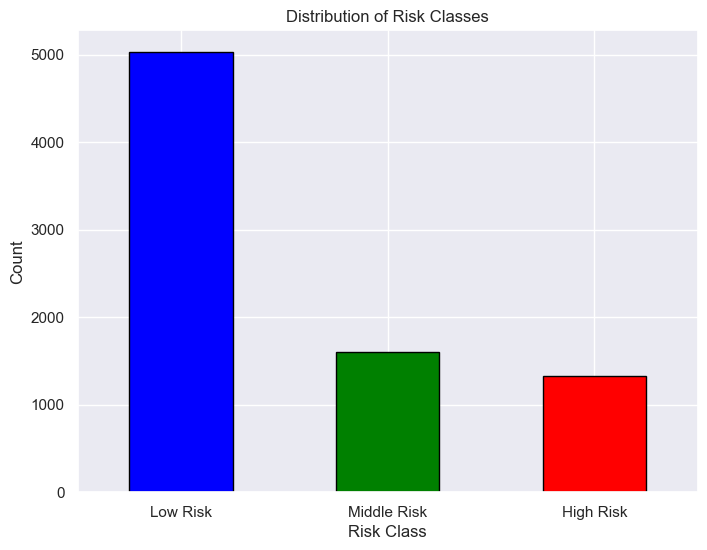

In [13]:
class_counts = raw_data["Risk Class"].value_counts()
plt.figure(figsize=(8, 6))
ax = class_counts.plot(kind="bar", color=["blue", "green", "red"], edgecolor='black')
plt.xlabel("Risk Class")
plt.ylabel("Count")
plt.xticks(range(3), ["Low Risk", "Middle Risk", "High Risk"], rotation=0)
plt.title("Distribution of Risk Classes")
sns.set(style="white")  
ax.spines['top'].set_visible(True)  
ax.spines['right'].set_visible(True)
plt.show()

#### 8.2 Observing the GENDER Distribution

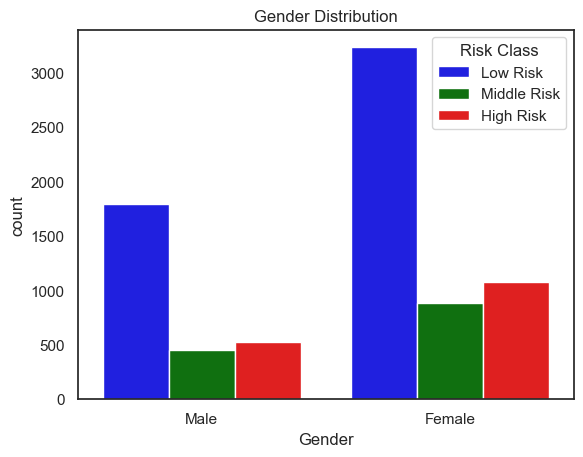

In [14]:
plot = sns.countplot(x="Gender", data=raw_data, hue="Risk Class", palette={"LowRisk": "blue", "MiddleRisk": "green", "HighRisk": "red"})
plot.set_xticklabels(["Male", "Female"])
plt.legend(title="Risk Class", labels=["Low Risk", "Middle Risk", "High Risk"])  # Добави затваряща кавичка след "High Risk"
plt.title("Gender Distribution")
sns.set(style="whitegrid")  # Промени стила на фона
plt.show()


#### 8.3 Observing the LIMIT Distribution

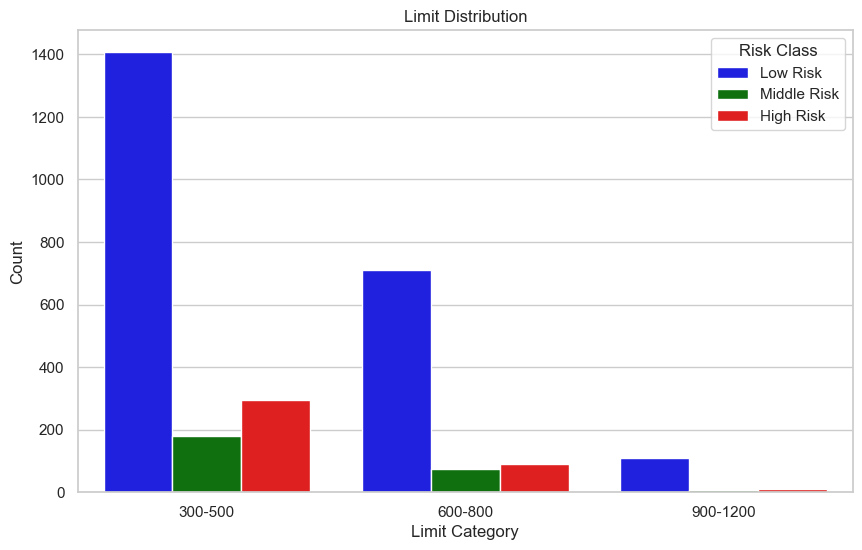

In [15]:
raw_data["Limit Category"] = pd.cut(raw_data["Limit"], bins=[300, 500, 800, 1200], labels=["300-500", "600-800", "900-1200"])
plt.figure(figsize=(10, 6))
sns.countplot(x="Limit Category", hue="Risk Class", data=raw_data, palette={"LowRisk": "blue", "MiddleRisk": "green", "HighRisk": "red"})
plt.legend(title="Risk Class", labels=["Low Risk", "Middle Risk", "High Risk"])
plt.xlabel("Limit Category")
plt.ylabel("Count")
sns.set(style="white")  
plt.title("Limit Distribution")
plt.show()


### 9. Exploring Data Distributions and Outliers

#### 9.1 Detecting Outliers using KDE

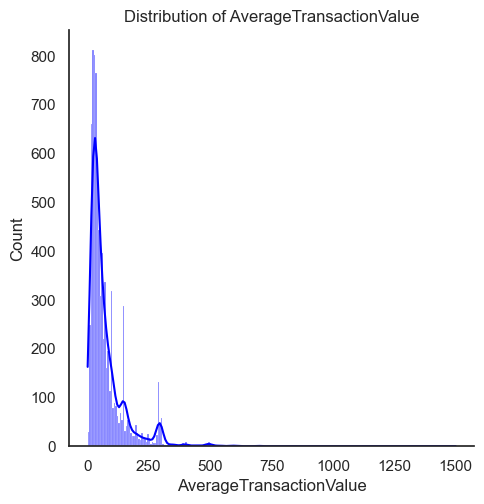

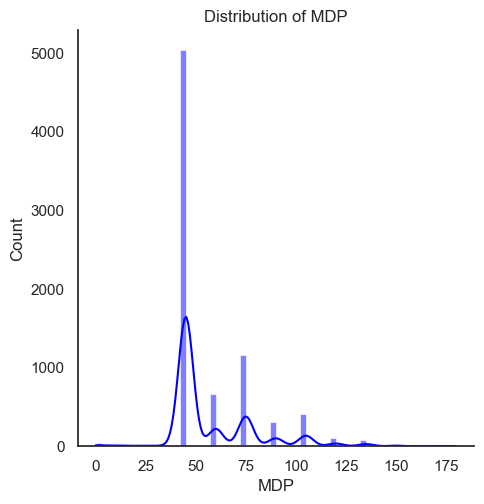

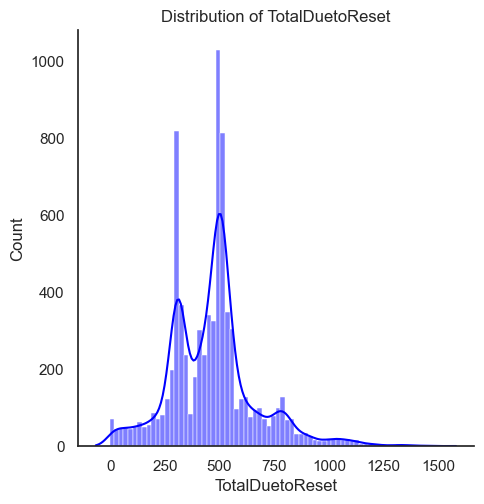

In [16]:
attributes = ["AverageTransactionValue", "MDP", "TotalDuetoReset"]
for attr in attributes:
    sns.set(style="white")
    sns.displot(raw_data[attr], kde=True, color="Blue") 
    plt.title(f'Distribution of {attr}')
    plt.show()
    
    

#### 9.2 Detecting Outliers using Box Plot

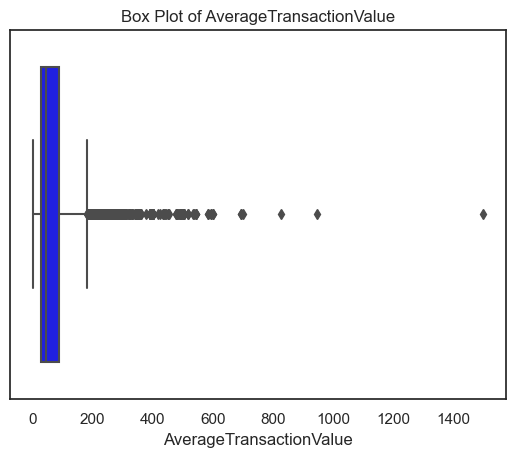

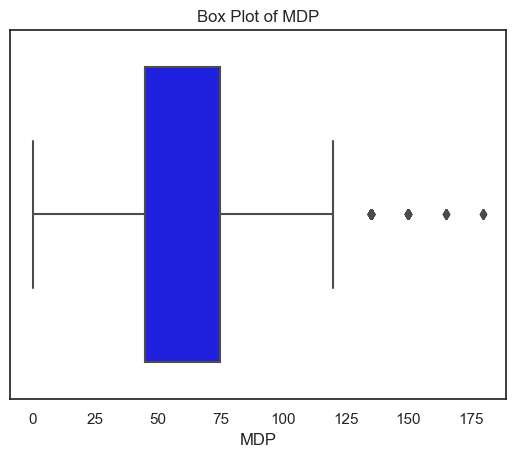

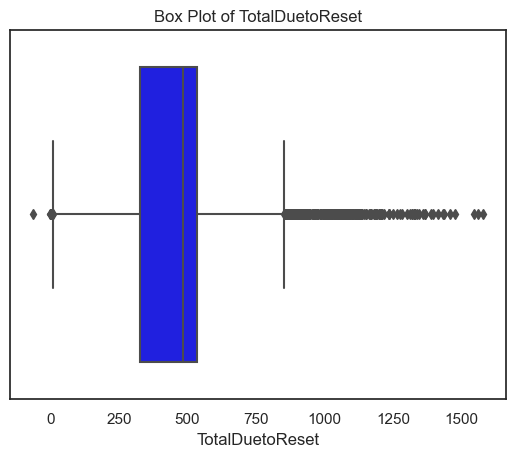

In [17]:
attributes = ["AverageTransactionValue", "MDP", "TotalDuetoReset"]
for attr in attributes:
    sns.set(style="white")
    sns.boxplot(x=raw_data[attr], color="blue")
    plt.title(f'Box Plot of {attr}')
    plt.show()

#### 9.3 Quantifying Outliers in Key Features using Interquartile Range (IQR) 

In [18]:
Q1 = raw_data[["AverageTransactionValue", "MDP", "TotalDuetoReset"]].quantile(0.25)
Q3 = raw_data[["AverageTransactionValue", "MDP", "TotalDuetoReset"]].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((raw_data[["AverageTransactionValue", "MDP", "TotalDuetoReset"]] < lower_bound) | (raw_data[["AverageTransactionValue", "MDP", "TotalDuetoReset"]] > upper_bound)).sum()

print("Number of outliers in the 'AverageTransactionValue' column:", outliers["AverageTransactionValue"])
print("Number of outliers in the 'MDP' column", outliers["MDP"])
print("Number of outliers in the 'TotalDuetoReset' column :", outliers["TotalDuetoReset"])
 

Number of outliers in the 'AverageTransactionValue' column: 625
Number of outliers in the 'MDP' column 118
Number of outliers in the 'TotalDuetoReset' column : 374


## IV. Data Preparation

### 1. Splitting the data into training and testing sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_targets, test_size=0.2, random_state=42)

## V. Model Initialization and Performance Evaluation

### 1. Logistic Regression

#### 1.1 Data Preprocessing for Logistic Regression

##### 1.1.1 Class Balancing using Random Oversimple

In [20]:
from imblearn.over_sampling import RandomOverSampler

o_smpl = RandomOverSampler(random_state = 42) 
X_o_smpl, y_o_smpl = o_smpl.fit_resample(X_train,y_train)

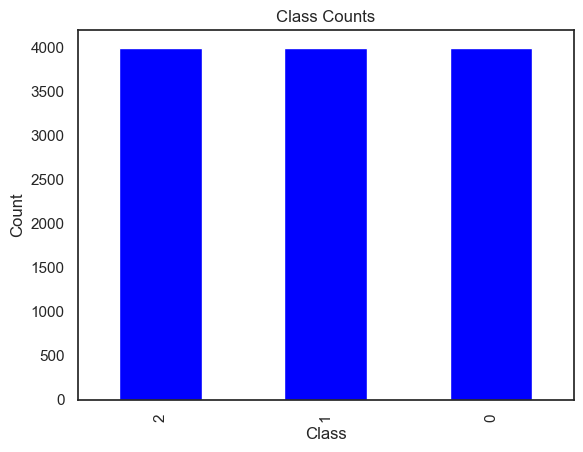

In [21]:
y_o_smpl.value_counts().plot.bar(color='blue')
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Counts")
plt.show()


##### 1.1.2 Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_o_smpl)

In [24]:
X_test_scaled = scaler.transform(X_test)

#### 1.2 Model Deployment

##### 1.2.1 Model Deployment (NO Preprocessing)

In [25]:
logit_model = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)

In [26]:
logit_model.fit(X_train, y_train)

LogisticRegression(C=10, multi_class='multinomial')

In [27]:
predictions_logit = logit_model.predict(X_test)

##### 1.2.2 Model Deployment (WITH Preprocessing)

In [28]:
logit_model_pp = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)

In [29]:
logit_model_pp.fit(X_train_scaled, y_o_smpl)

LogisticRegression(C=10, multi_class='multinomial')

In [30]:
predictions_logit_pp = logit_model_pp.predict(X_test_scaled)

#### 1.3 Model Evaluation

##### 1.3.1 Model Evaluation (NO Preprocessing)

In [31]:
conf_matrix_logit = confusion_matrix(y_test, predictions_logit)

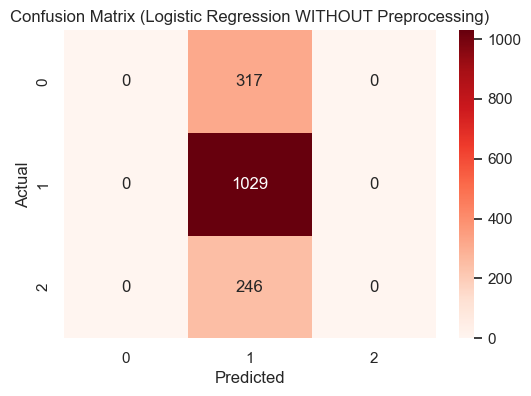

In [32]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logit, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logistic Regression WITHOUT Preprocessing)")
plt.show()

In [33]:
report_logit = classification_report(y_test, predictions_logit)

C:\Users\aleksandar.dimitrov\AppData\Local\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aleksandar.dimitrov\AppData\Local\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aleksandar.dimitrov\AppData\Local\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [34]:
print("\nClassification Report (Logistic Regression WITHOUT Preprocessing):")
print(report_logit)


Classification Report (Logistic Regression WITHOUT Preprocessing):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       317
           1       0.65      1.00      0.79      1029
           2       0.00      0.00      0.00       246

    accuracy                           0.65      1592
   macro avg       0.22      0.33      0.26      1592
weighted avg       0.42      0.65      0.51      1592



In [35]:
y_score = logit_model.predict_proba(X_test)

In [36]:
# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

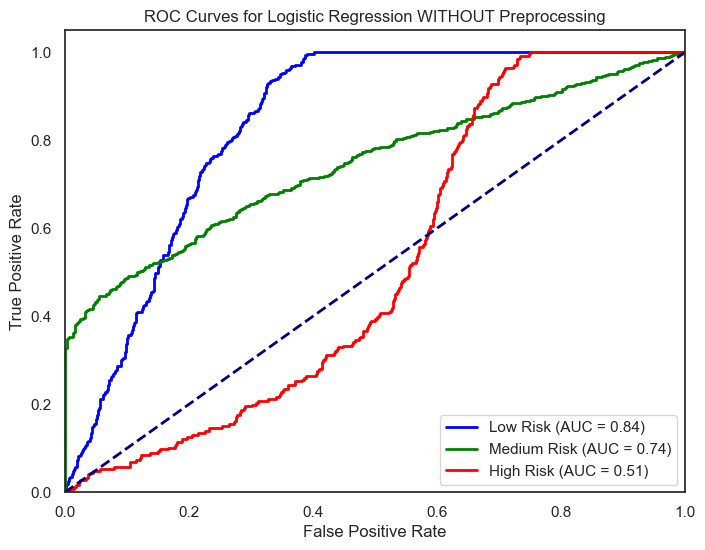

In [37]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
labels = ['Low Risk', 'Medium Risk', 'High Risk']

for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=2, color=colors[i], label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression WITHOUT Preprocessing')
plt.legend(loc='lower right')
plt.show()

##### 1.3.2 Model Evaluation (WITH Preprocessing)

In [38]:
conf_matrix_logit_pp = confusion_matrix(y_test, predictions_logit_pp)

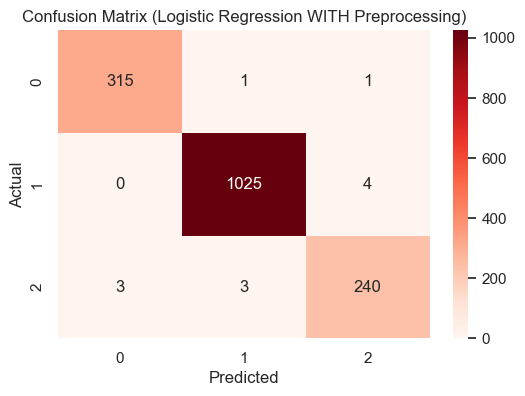

In [39]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logit_pp, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logistic Regression WITH Preprocessing)")
plt.show()

In [40]:
report_logit_pp = classification_report(y_test, predictions_logit_pp)

In [41]:
print("\nClassification Report (Logistic Regression WITH Preprocessing):")
print(report_logit_pp)


Classification Report (Logistic Regression WITH Preprocessing):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       317
           1       1.00      1.00      1.00      1029
           2       0.98      0.98      0.98       246

    accuracy                           0.99      1592
   macro avg       0.99      0.99      0.99      1592
weighted avg       0.99      0.99      0.99      1592



In [42]:
y_score_pp = logit_model_pp.predict_proba(X_test_scaled)

In [43]:
# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score_pp[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

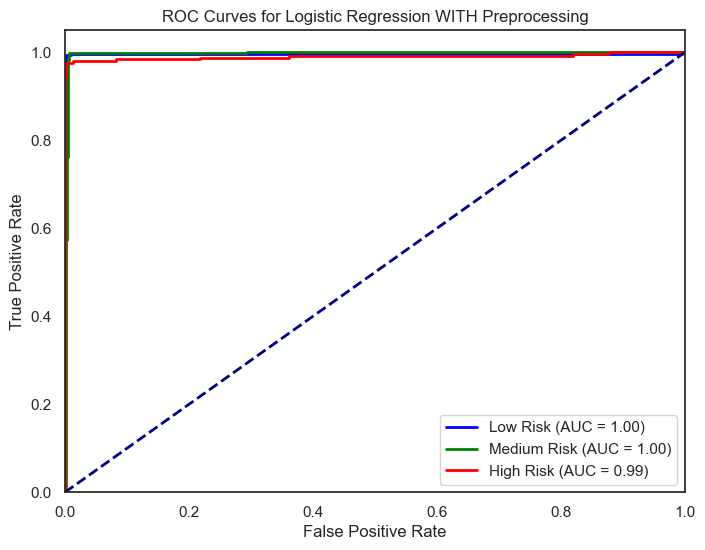

In [44]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
labels = ['Low Risk', 'Medium Risk', 'High Risk']

for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=2, color=colors[i], label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression WITH Preprocessing')
plt.legend(loc='lower right')
plt.show()

### 2. Decison Trees Classifier


#### 2.1 Model Deployment

In [45]:
dt_model = DecisionTreeClassifier(max_depth=3)

In [46]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [47]:
predictions_dt = dt_model.predict(X_test)

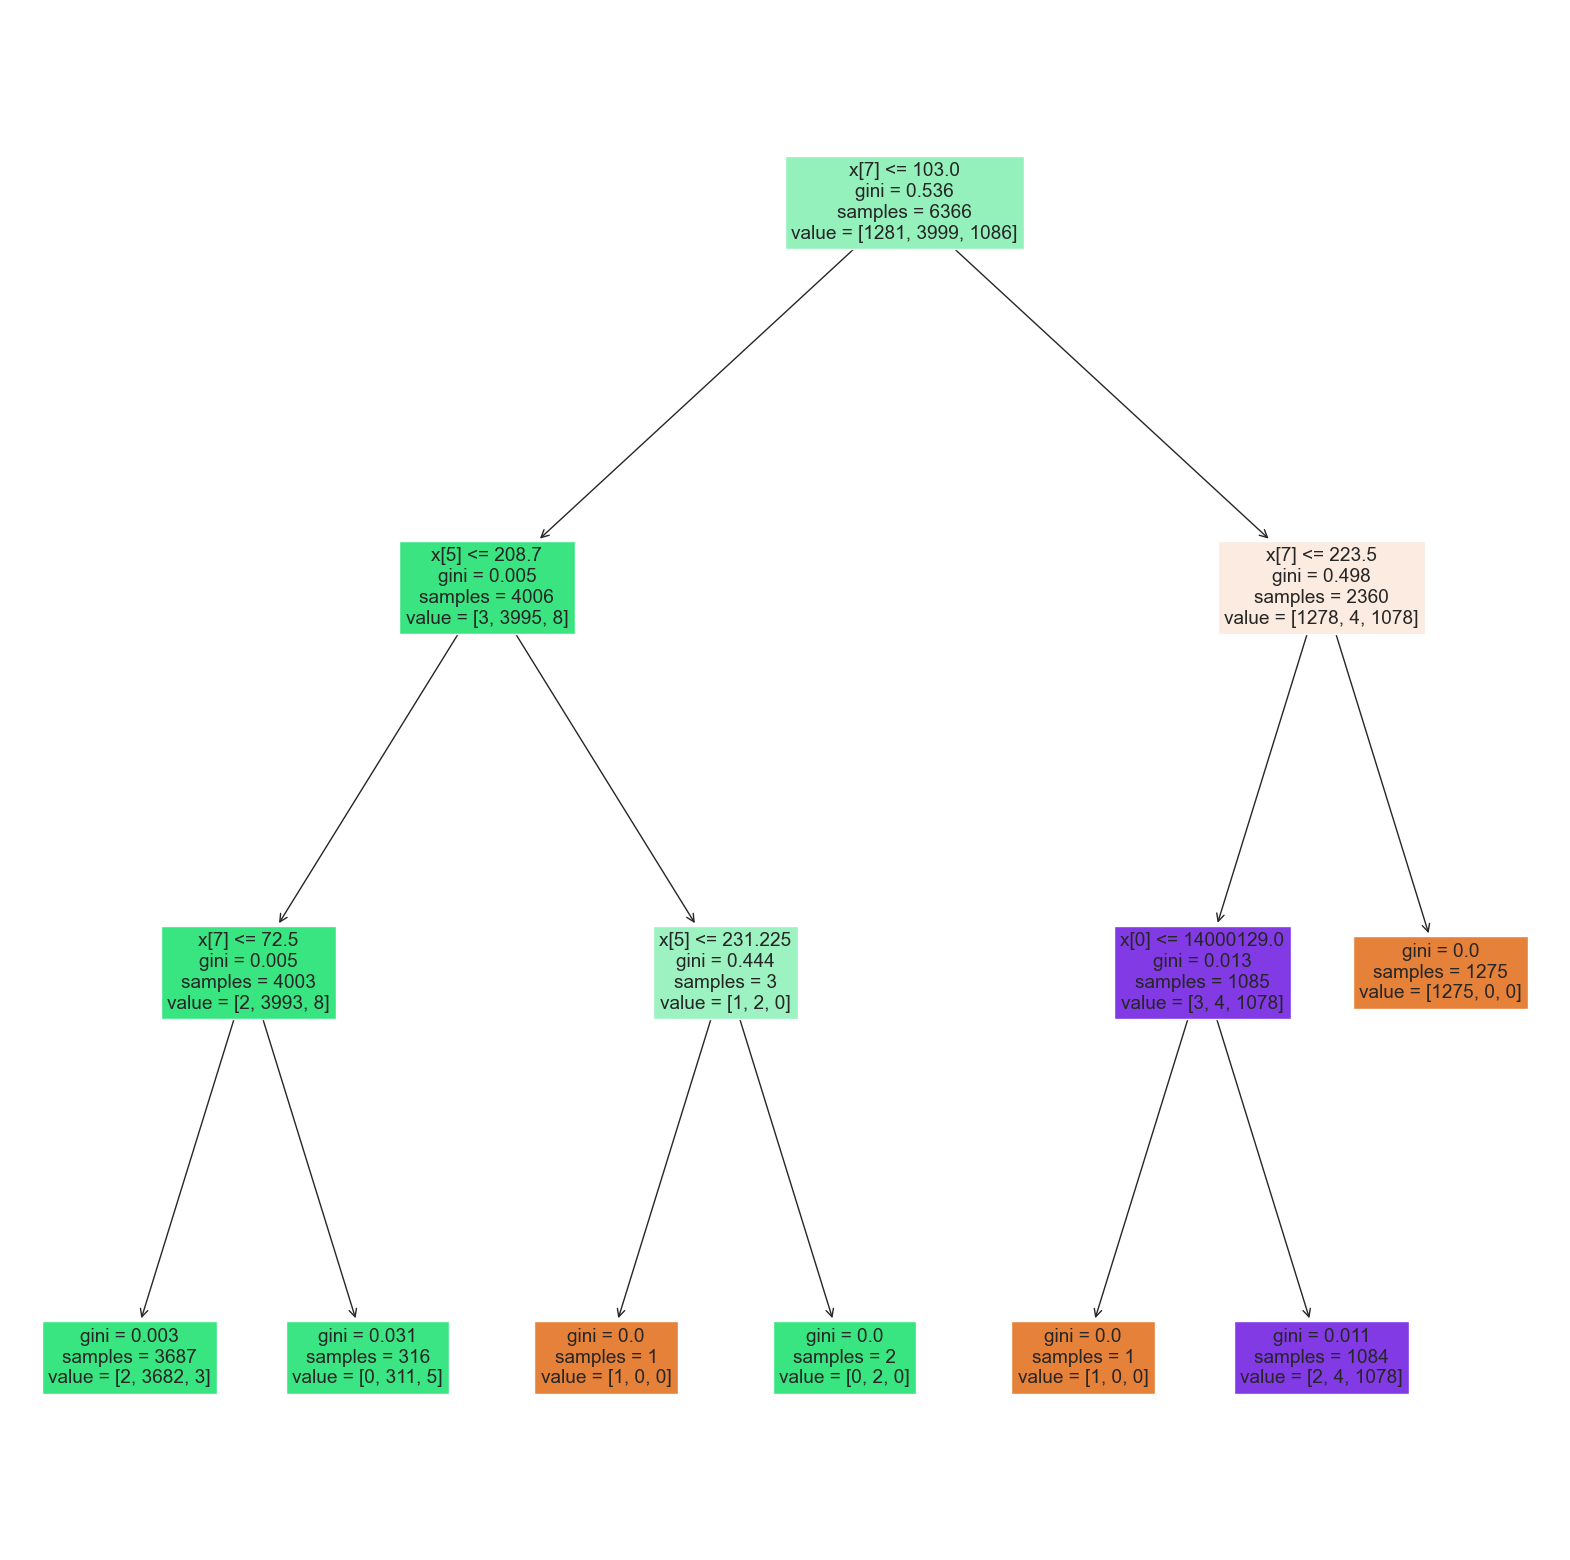

In [48]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model, filled=True)
plt.show()

#### 2.2 Model Evaluation

In [49]:
conf_matrix_dt = confusion_matrix(y_test, predictions_dt)

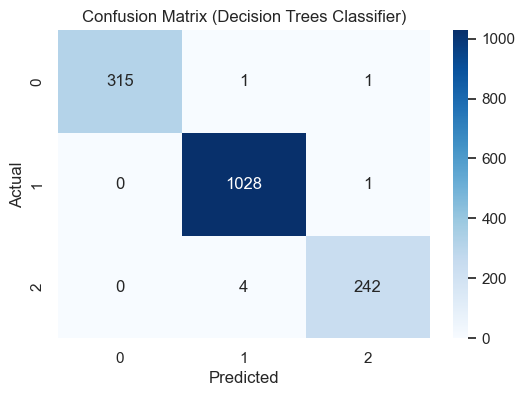

In [50]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Decision Trees Classifier)")
plt.show()

In [51]:
class_report_dt = classification_report(y_test, predictions_dt)

In [52]:
print("\nClassification Report (Decision Trees Classifier)")
print(class_report_dt)


Classification Report (Decision Trees Classifier)
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       317
           1       1.00      1.00      1.00      1029
           2       0.99      0.98      0.99       246

    accuracy                           1.00      1592
   macro avg       1.00      0.99      0.99      1592
weighted avg       1.00      1.00      1.00      1592



In [53]:
y_test_binary = np.zeros((y_test.shape[0], 3))
for i in range(3):
    y_test_binary[:, i] = (y_test == i).astype(int)

In [54]:
y_score = dt_model.predict_proba(X_test)

In [55]:
fpr = []
tpr = []
roc_auc = []

In [56]:
for i in range(3):
    fpr_i, tpr_i, _ = roc_curve(y_test_binary[:, i], y_score[:, i])
    roc_auc_i = auc(fpr_i, tpr_i)
    fpr.append(fpr_i)
    tpr.append(tpr_i)
    roc_auc.append(roc_auc_i)

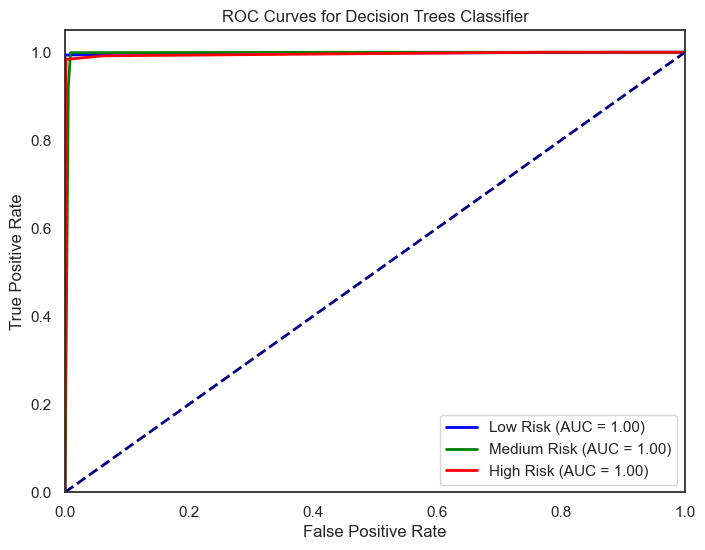

In [57]:
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
labels = ['Low Risk', 'Medium Risk', 'High Risk']

for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=2, color=colors[i], label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curves for Decision Trees Classifier")
plt.legend(loc='lower right')
plt.show()

In [58]:
y_pred_prob_dt = dt_model.predict_proba(X_test)

In [59]:
auc_dt = roc_auc_score(y_test, y_pred_prob_dt, multi_class='ovr')
gini_dt = 2 * auc_dt - 1

In [60]:
print("AUC (Decision Trees):", auc_dt)
print("GINI (Decision Trees):", gini_dt)

AUC (Decision Trees): 0.996780869272167
GINI (Decision Trees): 0.993561738544334


### 3. Random Forest Classifier

#### 3.1 Model Deployment

In [61]:
rf_model = RandomForestClassifier(random_state=42)

In [62]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
predictions_rf = rf_model.predict(X_test) 

#### 3.2 Model Evaluation

In [64]:
class_report_rf = classification_report(y_test, predictions_rf)

In [65]:
conf_matrix_rf = confusion_matrix(y_test, predictions_rf)

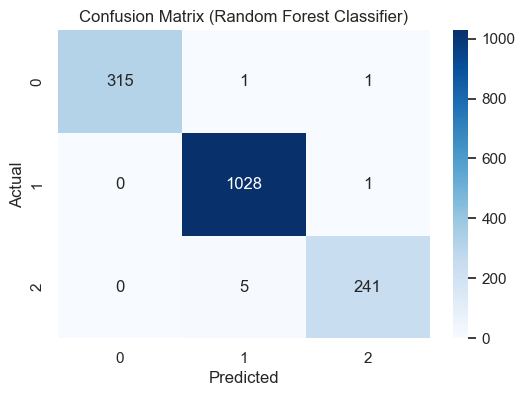

In [66]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest Classifier)")
plt.show()

In [67]:
print("\nClassification Report (Random Forest Classifier)")
print(class_report_rf)


Classification Report (Random Forest Classifier)
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       317
           1       0.99      1.00      1.00      1029
           2       0.99      0.98      0.99       246

    accuracy                           0.99      1592
   macro avg       1.00      0.99      0.99      1592
weighted avg       0.99      0.99      0.99      1592



In [68]:
rf_probabilities = rf_model.predict_proba(X_test)

In [69]:
pr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), rf_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

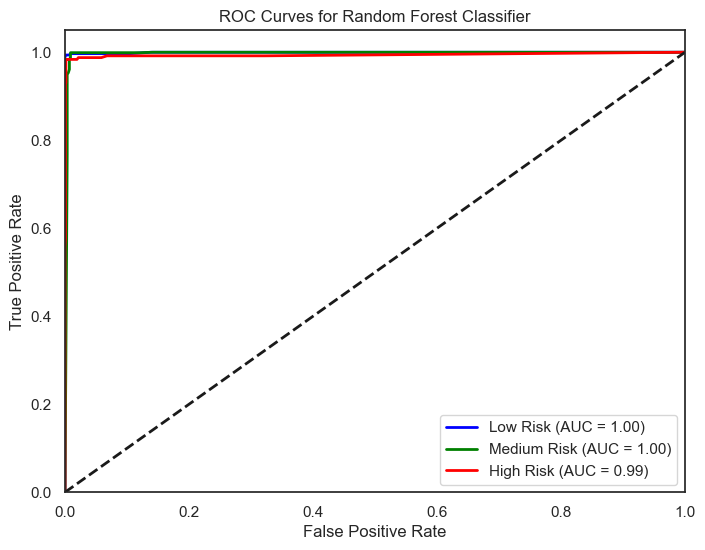

In [70]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=2, color=colors[i], label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')      
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

In [71]:
y_pred_prob_rf = rf_model.predict_proba(X_test)

In [72]:
auc_rf = roc_auc_score(y_test, y_pred_prob_rf, multi_class='ovr')
gini_rf = 2 * auc_rf - 1

In [73]:
print("AUC (Random Forest):", auc_rf)
print("GINI (Random Forest):", gini_rf)

AUC (Random Forest): 0.9970104211383294
GINI (Random Forest): 0.9940208422766588


### 4. XGboost Classifier

#### 4.1 Model Deployment

##### 4.1.1 Model Deployment (WITHOUT using cross-validation)

In [74]:
xgb_model = xgb.XGBClassifier(random_state=42)

In [75]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [76]:
xgb_predictions = xgb_model.predict(X_test)

##### 4.2.2 Model Deployment (USING cross-validation)

In [77]:
xgb_model_cv = xgb.XGBClassifier(random_state=42)

In [78]:
xgb_model_cv.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [79]:
xgb_predictions_cv = cross_val_predict(xgb_model_cv, X_train, y_train, cv=5)

#### 4.2 Model Evaluation

##### 4.2.1 Model Evaluation (WITHOUT using cross-validation)

In [80]:
class_report_xgb = classification_report(y_test, xgb_predictions)


In [81]:
conf_matrix_xgb = confusion_matrix(y_test, xgb_predictions)


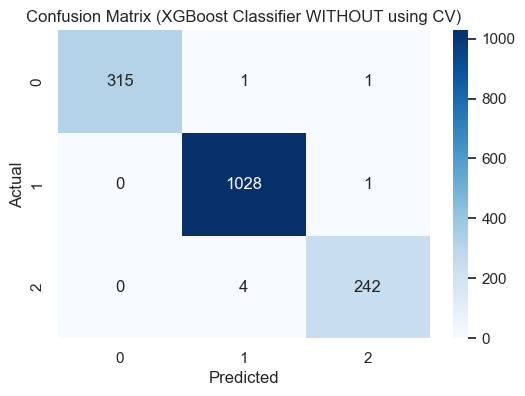

In [82]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (XGBoost Classifier WITHOUT using CV)")
plt.show()

In [83]:
print("\nClassification Report (XGBoost Classifier WITHOUT using CV)")
print(class_report_xgb)


Classification Report (XGBoost Classifier WITHOUT using CV)
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       317
           1       1.00      1.00      1.00      1029
           2       0.99      0.98      0.99       246

    accuracy                           1.00      1592
   macro avg       1.00      0.99      0.99      1592
weighted avg       1.00      1.00      1.00      1592



In [84]:
xgb_probabilities = xgb_model.predict_proba(X_test)

In [85]:
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), xgb_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

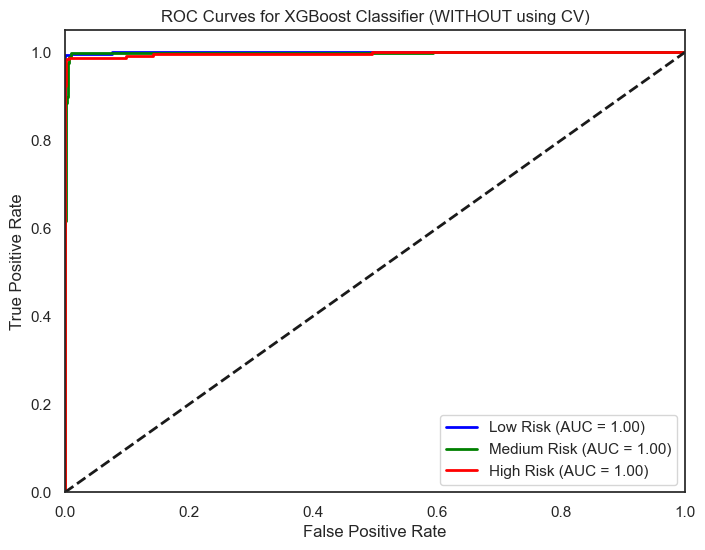

In [86]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=2, color=colors[i], label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')      
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for XGBoost Classifier (WITHOUT using CV)')
plt.legend(loc="lower right")
plt.show()

In [87]:
y_pred_prob_xgb = xgb_model.predict_proba(X_test)

In [88]:
auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb, multi_class="ovr")
gini_xgb = 2 * auc_xgb - 1
print("AUC (XGBoost WITHOUT using CV):", auc_xgb)
print("GINI(XGBoost WITHOUT using CV):", gini_xgb)

AUC (XGBoost WITHOUT using CV): 0.9981366143374076
GINI(XGBoost WITHOUT using CV): 0.9962732286748153


##### 4.2.2 Model Evaluation (USING cross-validation)

In [89]:
xgb_class_report_cv = classification_report(y_train, xgb_predictions_cv)

In [90]:
xgb_conf_matrix_cv = confusion_matrix(y_train, xgb_predictions_cv)

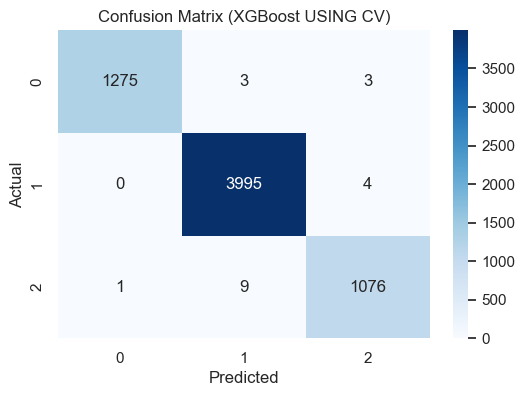

In [91]:
plt.figure(figsize=(6, 4))
sns.heatmap(xgb_conf_matrix_cv, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (XGBoost USING CV)")
plt.show()

In [92]:
print("Classification Report (XGBoost USING CV ):")
print(xgb_class_report_cv)

Classification Report (XGBoost USING CV ):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1281
           1       1.00      1.00      1.00      3999
           2       0.99      0.99      0.99      1086

    accuracy                           1.00      6366
   macro avg       1.00      1.00      1.00      6366
weighted avg       1.00      1.00      1.00      6366



In [93]:
xgb_probabilities_cv = xgb_model_cv.predict_proba(X_test)

In [94]:
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), xgb_probabilities_cv[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

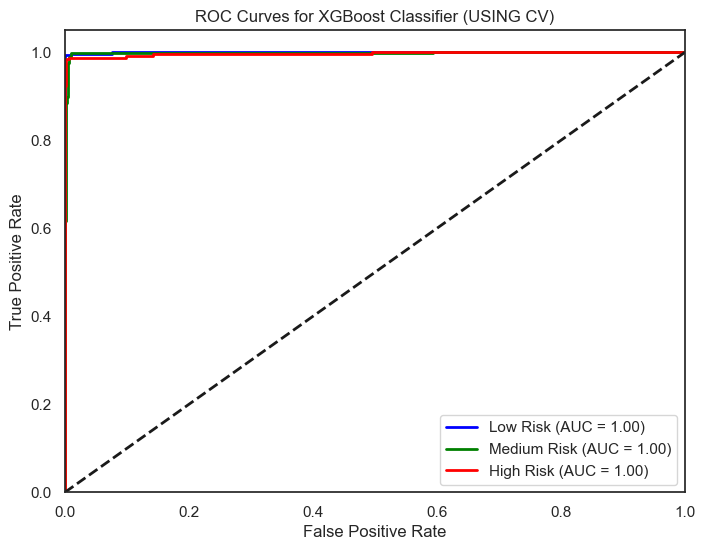

In [95]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=2, color=colors[i], label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')      
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for XGBoost Classifier (USING CV)')
plt.legend(loc="lower right")
plt.show()

In [96]:
y_pred_prob_xgb_cv = xgb_model_cv.predict_proba(X_test)

In [97]:
auc_xgb_cv = roc_auc_score(y_test, y_pred_prob_xgb, multi_class="ovr")
gini_xgb_cv = 2 * auc_xgb - 1
print("AUC (XGBoost USING CV):", auc_xgb_cv)
print("GINI(XGBoost USING CV):", gini_xgb_cv)

AUC (XGBoost USING CV): 0.9981366143374076
GINI(XGBoost USING CV): 0.9962732286748153


### 5. Models Performance Summary

#### 5.1 Accuracy and Precision Comparison

In [98]:
import pandas as pd

data = {
    "Model": [
        "Logistic Regression",
        "Decision Trees",
        "Random Forest",
        "XGBoost using CV"
    ],
    "Macro Avg Precision": [0.99, 1.00, 0.99, 1.00],
    "Weighted Avg Precision": [0.99, 1.00, 0.99, 1.00],
    "Accuracy": [0.99, 1.00, 0.99, 1.00],
    "F1-Score": [0.99, 1.00, 0.99, 1.00]
}

summary_df = pd.DataFrame(data)
summary_df = summary_df[["Model", "Macro Avg Precision", "Weighted Avg Precision", "Accuracy", "F1-Score"]]
print(summary_df)



                 Model  Macro Avg Precision  Weighted Avg Precision  Accuracy  \
0  Logistic Regression                 0.99                    0.99      0.99   
1       Decision Trees                 1.00                    1.00      1.00   
2        Random Forest                 0.99                    0.99      0.99   
3     XGBoost using CV                 1.00                    1.00      1.00   

   F1-Score  
0      0.99  
1      1.00  
2      0.99  
3      1.00  


#### 5.2 GINI Index Comparison for Ensemble Models

In [99]:
gini_data = {
    "Model": [
        "Decision Trees",
        "Random Forest",
        "XGBoost WITHOUT using CV",
        "XGBoost using CV"
    ],
    "GINI": [0.993561738544334, 0.9940208422766588, 0.9962732286748153, 0.9962732286748153]
}
gini_df = pd.DataFrame(gini_data)
gini_df = gini_df.sort_values(by="GINI", ascending=True)
print(gini_df)

                      Model      GINI
0            Decision Trees  0.993562
1             Random Forest  0.994021
2  XGBoost WITHOUT using CV  0.996273
3          XGBoost using CV  0.996273
